# Chapter 5.3. The Case of Literary Fiction

# 5.3.0. Getting Basic Data 

In [2]:
import sys
import os
import glob
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, text2features, st_tests, process_labels
import pandas as pd
import re
import numpy as np
import scipy.stats as stats

In [3]:
outdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/chap5_3/"

In [4]:
reference_labels_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/reading_robot/data/tokens-labels_semantic-labels.csv", sep="\t",index_col=False)
reference_labels_df.shape

(276, 4)

In [5]:
reference_labels_df.head(3)

,label,lexical_label_reference,semantic_label_reference,thema_code
0,almacenamiento de datos externo,almacenamiento,almacenamiento,-
1,novela americana,americana,americana,-
2,del caribe y américa latina,hispanoamericana,americana,-


In [6]:
reference_labels_df.loc[reference_labels_df["semantic_label_reference"]=="ficción, literatura"]

,label,lexical_label_reference,semantic_label_reference,thema_code
108,ficción clásica,ficción,"ficción, literatura",FBC
109,ficción contemporánea,ficción,"ficción, literatura",FBA
110,novelas y ficción literaria,ficción,"ficción, literatura",FB


In [7]:
sources_genre = ['subgenre.cligs', 'genre.subtitle', 'subgenre.lithist.MdLE', 'subgenre.lithist.HdLE', 'subgenre.edit.epublibre', 'subgenre.edit.amazon', 'subgenre.edit.wikidata', 'subgenre.edit.esdbpedia', 'subgenre.subtitle.bne']

In [8]:
subgenres = sorted(['guerra', 'diálogo', 'histórica', 'humor', 'aventura', 'nivola', 'poética', 'memorias', 'naturalista', 'erótica', 'greguería', 'fantástico', 'episodio nacional', 'costumbrista', 'social', 'espiritual', 'realista', 'autobiografía', 'psicológica', 'modernista', 'biografía', 'educación', 'filosófica'])
len(subgenres)

23

In [9]:
metadata_df = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/", metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",").fillna("")
metadata_df.shape

metadata and class shape: 	 (358, 174)


(358, 174)

In [10]:
recat_metadata_df =  pd.read_csv("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_recategorized.csv", sep="\t",index_col=0)
recat_metadata_df.shape

(358, 183)

In [11]:
quantied_metadata_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_quantified-subgenres.csv", sep="\t",index_col=0)
quantied_metadata_df.shape

(358, 196)

The label "novela" is deleted.

In [12]:
metadata_df[sources_genre] = process_labels.delete_specific_label(metadata_df[sources_genre], "novela")

In [13]:
metadata_df.head()

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.wnlex.noun.Topss,am.wnlex.noun.relations,am.wnlex.noun.attributes,am.wnlex.verb.emotions,am.wnlex.noun.locations,am.wnlex.noun.events,am.wnlex.verb.contacts,am.wnlex.xxxs,am.wnlex.verb.changes,decade
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,3.69129e+07,XX842743,...,121,13,483,200,312,177,518,41371,655,1900
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,239,39,821,314,336,355,684,70169,764,1880
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,253,17,725,396,301,327,498,54401,572,1890
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,288,24,1061,424,282,248,450,60648,553,1890
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,7.1396e+07,XX1014802,...,191,17,705,456,174,229,415,43359,446,1890


In [14]:
metadata_df["subgenre.edit.amazon"].head()

ne0001    Ficción contemporánea; Ficción clásica; Litera...
ne0002    Ficción clásica, Bibliotecas, Libros escolares...
ne0003    Ficción, Europea, Antologías; Ficción clásica;...
ne0004    Siglo XIX, Antigua y clásica; Ficción clásica;...
ne0005    Ficción clásica, Ficción contemporánea; Ficció...
Name: subgenre.edit.amazon, dtype: object

Get semantic labels:

In [15]:
semantic_labels_df = process_labels.modelize_metadata_labels(metadata_df[sources_genre], outdir, reference_labels_df, reference_column = "semantic_label_reference")
semantic_labels_df.shape

(358, 9)

The different labels about literary fiction are replaced with a unambiguous label "ficción-litearia":

In [16]:
semantic_labels_df["subgenre.edit.amazon"] = semantic_labels_df["subgenre.edit.amazon"].str.replace("ficción, literatura","ficción-literaria")

In [17]:
semantic_labels_df["subgenre.edit.amazon"] = semantic_labels_df["subgenre.edit.amazon"].str.replace("(^ficción[,;]|[,;]\s*ficción([,;]|$))",",ficción-literaria,")

<input>:1: DeprecationWarning: invalid escape sequence \s
<ipython-input-17-ae52d2f0c463>:1: DeprecationWarning: invalid escape sequence \s
  semantic_labels_df["subgenre.edit.amazon"] = semantic_labels_df["subgenre.edit.amazon"].str.replace("(^ficción[,;]|[,;]\s*ficción([,;]|$))",",ficción-literaria,")


In [18]:
semantic_labels_df.loc[semantic_labels_df["subgenre.edit.amazon"].str.contains("ciencia-ficción")]

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne
ne0113,"fantástico,crimen,aventura",,policíaca,,"fantástico,humor,intriga","humor,terror,ciencia-ficción",,,
ne0266,"fantástico,sentimental,aventura",,aventura,,aventura,"ficción-literaria,ciencia-ficción,ciencia-ficc...",,,


In [19]:
semantic_labels_df.loc[semantic_labels_df["subgenre.edit.amazon"].str.contains("ficción-política")]

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne
ne0081,"memorias,realista,sentimental,social",,,,realista,"ficción-política,ficción-literaria,",,realista,


Number of texts assigned with "liteary fiction":

In [20]:
semantic_labels_df.loc[semantic_labels_df["subgenre.edit.amazon"].str.contains("ficción-literaria")].shape

(178, 9)

In [21]:
semantic_labels_df["subgenre.edit.amazon"].str.count("ficción-literaria").head()

ne0001    2
ne0002    8
ne0003    3
ne0004    1
ne0005    7
Name: subgenre.edit.amazon, dtype: int64

The label "ficción literaria" is counted and added as new column:

In [22]:
metadata_df["freq.ficción-literaria"] = semantic_labels_df["subgenre.edit.amazon"].str.count("ficción-literaria")

In [23]:
metadata_df["freq.ficción-literaria"].head()

ne0001    2
ne0002    8
ne0003    3
ne0004    1
ne0005    7
Name: freq.ficción-literaria, dtype: int64

This is also saved as binary category:

In [24]:
metadata_df["ficción-literaria"] = (metadata_df["freq.ficción-literaria"] > 0).astype(int)

In [25]:
metadata_df["am.publishers"] = semantic_labels_df["subgenre.edit.amazon"].str.count(";")+1

In [26]:
metadata_df["prop.ficción-literaria"] = metadata_df["freq.ficción-literaria"] / metadata_df["am.publishers"]
metadata_df["prop.ficción-literaria"].fillna(0,inplace=True)


In [27]:
binary_metadata_df = (quantied_metadata_df[subgenres] > 0).astype(int)

In [28]:
binary_metadata_df["ficción-literaria"] = metadata_df["ficción-literaria"]

In [29]:
binary_metadata_df.head()

,autobiografía,aventura,biografía,costumbrista,diálogo,educación,episodio nacional,erótica,espiritual,fantástico,...,humor,memorias,modernista,naturalista,nivola,poética,psicológica,realista,social,ficción-literaria
ne0001,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
ne0002,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,1
ne0003,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,1
ne0004,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
ne0005,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,1


In [30]:
quantied_metadata_df[["ficción-literaria","freq.ficción-literaria","am.publishers","prop.ficción-literaria"]] = metadata_df[["ficción-literaria","freq.ficción-literaria","am.publishers","prop.ficción-literaria"]]

In [31]:
quantied_metadata_df.head()

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,autobiografía,psicológica,modernista,biografía,educación,filosófica,ficción-literaria,freq.ficción-literaria,am.publishers,prop.ficción-literaria
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,36912891.0,XX842743,...,0,0,0,0,0,0,1,2,4,0.500000
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,0,0,0,0,0,1,8,6,1.333333
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,0,0,0,0,0,1,3,4,0.750000
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,0,0,0,0,0,1,1,4,0.250000
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,0,0,0,1,0,1,7,6,1.166667


# 5.3.2. Description of Literary Fiction

In [32]:
reference_labels_df.loc[reference_labels_df["semantic_label_reference"]=="ficción, literatura"]

,label,lexical_label_reference,semantic_label_reference,thema_code
108,ficción clásica,ficción,"ficción, literatura",FBC
109,ficción contemporánea,ficción,"ficción, literatura",FBA
110,novelas y ficción literaria,ficción,"ficción, literatura",FB


Counting of the different labels about literary fiction:

In [33]:
Counter(metadata_df["subgenre.edit.amazon"].str.lower().str.contains("ficción clásica"))

Counter({False: 222, True: 136})

In [34]:
Counter(metadata_df["subgenre.edit.amazon"].str.lower().str.contains("ficción contemporánea"))

Counter({False: 272, True: 86})

In [35]:
Counter(metadata_df["subgenre.edit.amazon"].str.lower().str.contains("novelas y ficción literaria"))

Counter({False: 357, True: 1})

Overlap of both labels:

In [34]:
metadata_df.loc[(metadata_df["subgenre.edit.amazon"].str.lower().str.contains("ficción contemporánea")) & 
               (metadata_df["subgenre.edit.amazon"].str.lower().str.contains("ficción clásica"))
               ].shape

(54, 178)

In [35]:
metadata_df["ficción clásica"] = metadata_df["subgenre.edit.amazon"].str.lower().str.count("ficción clásica")

In [36]:
metadata_df["ficción contemporánea"] = metadata_df["subgenre.edit.amazon"].str.lower().str.count("ficción contemporánea")

Historical development of both labels:


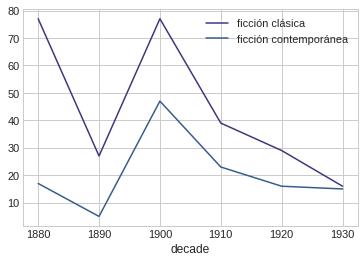

In [37]:
metadata_df.groupby(["decade"]).sum()[["ficción clásica","ficción contemporánea"]].plot.line()

Correlation of the frequency of both labels in each text:

In [38]:
metadata_df[["ficción clásica","ficción contemporánea"]].corr()

,ficción clásica,ficción contemporánea
ficción clásica,1.000000,0.477657
ficción contemporánea,0.477657,1.000000


Counter of the frequency of these labels:

In [36]:
Counter(quantied_metadata_df["freq.ficción-literaria"])

Counter({0: 180,
         1: 81,
         2: 34,
         3: 25,
         4: 13,
         5: 7,
         6: 5,
         7: 6,
         8: 3,
         9: 2,
         10: 1,
         12: 1})

Loop to calculate the average and std of the amount of sources and publishers that assign each label, including literary fiction:

In [42]:
data = []
for genre in subgenres+["freq.ficción-literaria"]:

    data.append([genre,quantied_metadata_df.loc[quantied_metadata_df[genre]>0][genre].mean(),quantied_metadata_df.loc[quantied_metadata_df[genre]>0][genre].std()])
    
subgenres_mean_quantification_label_df = pd.DataFrame(data,columns=["subgenre","mean","std"]).sort_values(by="mean",ascending=False).round(2)
subgenres_mean_quantification_label_df.index = subgenres_mean_quantification_label_df["subgenre"]
del subgenres_mean_quantification_label_df["subgenre"]
#subgenres_mean_quantification_label_df.rename(index=str,)
subgenres_mean_quantification_label_df.rename(index={"freq.ficción-literaria": "ficción literaria"}, inplace=True)


In [43]:
subgenres_mean_quantification_label_df

,mean,std
subgenre,,
greguería,3.00,0.00
episodio nacional,2.82,0.60
poética,2.57,2.57
ficción literaria,2.51,2.09
guerra,2.17,1.58
diálogo,2.11,0.93
humor,1.82,1.05
histórica,1.82,1.13
nivola,1.80,1.30


Results:

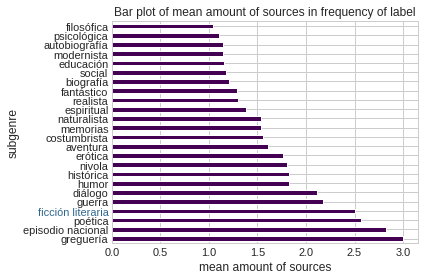

In [44]:
describe_data.simple_bars(subgenres_mean_quantification_label_df["mean"], "mean amount of sources", outdir, "frequency of label", color_label_position=3)

Correlations between proportion of literary fiction in the labels and the proxys about canonization of text and author:

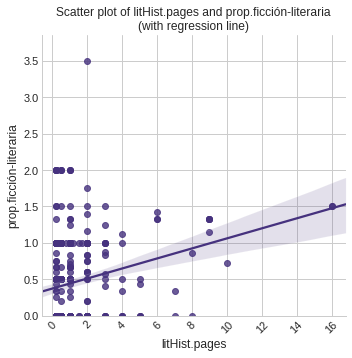

In [61]:
describe_data.describe_corpus_scatter(quantied_metadata_df, outdir, "litHist.pages", "prop.ficción-literaria", "CoNSSA")


In [62]:
stats.spearmanr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["litHist.pages"])
    

SpearmanrResult(correlation=0.22752837366331222, pvalue=1.3792908971156074e-05)

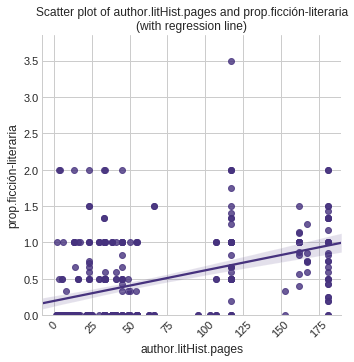

In [63]:
describe_data.describe_corpus_scatter(quantied_metadata_df, outdir, "author.litHist.pages", "prop.ficción-literaria", "CoNSSA")


In [64]:
stats.spearmanr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["author.litHist.pages"])

SpearmanrResult(correlation=0.4497118593790022, pvalue=3.1732428167619677e-19)

Data that correlates negatively with literary fiction:

In [79]:
quantied_metadata_df.corr(method="pearson").loc[["freq.ficción-literaria"]].T.sort_values("freq.ficción-literaria").head(10)

,freq.ficción-literaria
author.date.birth,-0.237218
year,-0.207688
decade,-0.203919
len.ss.std,-0.171082
len.chapters.std,-0.149324
len.chapters.iqr,-0.140374
len.ss.mean,-0.123941
len.chapters.mean,-0.122365
len.chapters.median,-0.120507
am.ss.active.verbs.std,-0.111681


In [138]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["author.litHist.pages"])

(0.42405506507913665, 4.6633568417529996e-17)

In [139]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["year"])

(-0.1761003014979655, 0.0008183541792345256)

In [67]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["len.ss.std"])

(-0.18257728434014095, 0.0005172359060998542)

In [68]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["len.ss.mean"])

(-0.12678860759745886, 0.016383544603555563)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


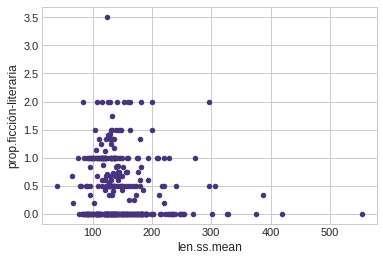

In [69]:
quantied_metadata_df.plot.scatter("len.ss.mean","prop.ficción-literaria")

In [140]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["am.tokens"])

(0.05236419821850976, 0.32315749328843735)

Features that have a positive correlation with literary fiction:

In [85]:
quantied_metadata_df.corr(method="pearson").loc[["freq.ficción-literaria"]].T.sort_values("freq.ficción-literaria").tail(35)

,freq.ficción-literaria
setting.settlement.represented.exist,0.105067
author.viaf,0.105083
aventura,0.114866
am.saids,0.119730
am.pds,0.124904
memorias,0.125153
am.interjections,0.125225
am.divisions,0.131606
educación,0.136411
social,0.141174


In [76]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["am.publishers"])

(0.279617374578757, 7.457218261258459e-08)

In [83]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["am.chapters"])

(0.17033821008072828, 0.0012149175631870233)

In [84]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["am.interjections"])

(0.11058474226619709, 0.036486616357426525)

In [86]:
stats.pearsonr(quantied_metadata_df["prop.ficción-literaria"],quantied_metadata_df["am.pds"])

(0.1209766287963896, 0.022056434176240123)

Even when literary fiction is understood as a categorical value (a text is part of literary fiction or not), there is a statiscal difference of the number of pages used in manuals for both groups:

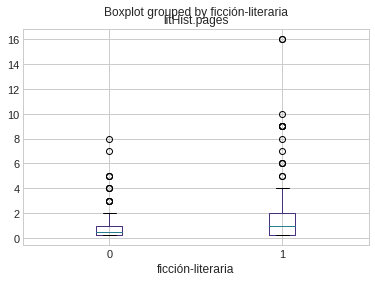

In [142]:
quantied_metadata_df.boxplot("litHist.pages", by="ficción-literaria")

In [143]:
quantied_metadata_df.groupby("ficción-literaria").median()["litHist.pages"]

ficción-literaria
0    0.5
1    1.0
Name: litHist.pages, dtype: float64

In [144]:
quantied_metadata_df.groupby("ficción-literaria").mean()["litHist.pages"]

ficción-literaria
0    0.847778
1    1.681461
Name: litHist.pages, dtype: float64

In [145]:
stats.ttest_ind(quantied_metadata_df.loc[quantied_metadata_df["ficción-literaria"]==1]["litHist.pages"], quantied_metadata_df.loc[quantied_metadata_df["ficción-literaria"]==0]["litHist.pages"], equal_var=False)

Ttest_indResult(statistic=4.040637751386137, pvalue=7.102861877184836e-05)

# 5.3.3. Classification with Linguistic Features

Getting data to classify:

In [87]:
from shutil import copyfile
copyfile("/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/exp_corpora/tags_ling_pos_diff_mw_ord_ent_70000_T.parquet", outdir+"tags_ling_pos_diff_mw_ord_ent_70000_T.parquet")

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap5_2_2/tags_ling_pos_diff_mw_ord_ent_70000_T.parquet'

In [88]:
tags_ling_pos_diff_mw_ord_ent_corpus_df = pd.read_parquet(outdir+"tags_ling_pos_diff_mw_ord_ent_70000_T.parquet").T

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [89]:
tags_ling_pos_diff_mw_ord_ent_corpus_df.head()

,",@form_punctuation@pos",am.divs,1@person,am.verses,de@form_adposition@pos,am.sps,2@person,am.paragraphs,.@form_punctuation@pos,am.pds,...,formalizó@form_verb@pos,volvime@form_adjective@pos,pegadito@form_verb@pos,lavarán@form_verb@pos,abrumo@form_verb@pos,cestillos@form_noun@pos,glicina@form_noun@pos,patriarcalmente@form_adverb@pos,impeler@form_verb@pos,fumadora@form_noun@pos
ne0001,3448,41,1001,71,2797,0,678,2354,2801,1242,...,0,0,0,0,0,0,0,0,0,0
ne0002,8003,42,2935,0,4435,0,1713,1498,3105,1104,...,0,0,0,0,0,0,0,0,0,0
ne0003,6493,41,2875,0,3192,0,1305,1160,2552,851,...,0,0,0,0,0,0,0,0,0,0
ne0004,7411,45,3540,0,3753,0,1642,1272,3099,978,...,0,0,0,0,0,0,0,0,0,0
ne0005,4827,30,2870,0,2839,0,1461,556,2172,299,...,0,0,0,0,0,0,0,0,0,0


In [90]:
rel_tags_ling_pos_diff_mw_ord_ent_corpus_df = tags_ling_pos_diff_mw_ord_ent_corpus_df.divide(metadata_df["am.tokens"],axis=0)

In [91]:
rel_tags_ling_pos_diff_mw_ord_ent_corpus_df.head()

,",@form_punctuation@pos",am.divs,1@person,am.verses,de@form_adposition@pos,am.sps,2@person,am.paragraphs,.@form_punctuation@pos,am.pds,...,formalizó@form_verb@pos,volvime@form_adjective@pos,pegadito@form_verb@pos,lavarán@form_verb@pos,abrumo@form_verb@pos,cestillos@form_noun@pos,glicina@form_noun@pos,patriarcalmente@form_adverb@pos,impeler@form_verb@pos,fumadora@form_noun@pos
ne0001,0.064356,0.000765,0.018683,0.001325,0.052205,0.0,0.012655,0.043937,0.052280,0.023182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ne0002,0.095511,0.000501,0.035028,0.000000,0.052929,0.0,0.020444,0.017878,0.037056,0.013176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ne0003,0.100304,0.000633,0.044413,0.000000,0.049310,0.0,0.020160,0.017920,0.039423,0.013146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ne0004,0.101035,0.000613,0.048261,0.000000,0.051165,0.0,0.022386,0.017341,0.042249,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ne0005,0.091833,0.000571,0.054601,0.000000,0.054011,0.0,0.027795,0.010578,0.041322,0.005688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Classification using linguistic features:

In [44]:
results_df = classify.classify(wdir = outdir, freq_table  = rel_tags_ling_pos_diff_mw_ord_ent_corpus_df,
                            metadata = quantied_metadata_df,
              classes = subgenres+["ficción-literaria"], verbose = True,
              methods = ["LR"],#, 
              max_MFFs = [10,100,3000,5000,7000],  minimal_value_samples = 2,
              text_representations = ["log","log10","zscores"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features          ,@form_punctuation@pos   am.divs  1@person  am.verses  \
ne0001                0.064356  0.000765  0.018683   0.001325   
ne0002                0.095511  0.000501  0.035028   0.000000   
ne0003                0.100304  0.000633  0.044413   0.000000   
ne0004                0.101035  0.000613  0.048261   0.000000   
ne0005                0.091833  0.000571  0.054601   0.000000   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                0.052205     0.0  0.012655       0.043937   
ne0002                0.052929     0.0  0.020444       0.017878   
ne0003                0.049310     0.0  0.020160       0.017920   
ne0004                0.051165     0.0  0.022386       0.017341   
ne0005                0.054011     0.0  0.027795       0.010578   

        .@form_punctuation@pos    am.pds           ...            \
ne0001                0.052280  0.023182           ...             
ne0002                0.037056  0.013176           .

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
r

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validat

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['237@ord_ent', '223@ord_ent', '221@ord_ent']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 10) lpc
cross validation sampling of  autobiografía
(358,)
(358, 10)
undersampling lpc
undersampled (58,) (58, 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358

(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.349326380251474, pvalue=5.696893970261317e-07)
Class: 	 aventura
Scores:
 	 f1      0.684
rec     0.740
prec    0.641
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.1840000000

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biograf

(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.947638556494701, pvalue=0.003993916005444082)
Class: 	 biografía
Scores:
 	 f1      0.513
rec     0.542
prec    0.515
dtype: float64
p-value:  0.004
Baseline: 		 0.5
LR
0.0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation samp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sa

(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
(358,)
(358, 10)
undersampling lpc
undersampled (32,) (32, 10) lpc
cross validation sampling of  costumbrista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.672712768698103, pvalue=0.0003893466068338806)
Class: 	 costumbrista
Scores:
 	 f1      0.340
rec     0.450
prec    0.283
dtype: float64
p-value:  0.0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358

(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.424063255315757, pvalue=0.0009346878756971087)
Class: 	 diálogo
Scores:
 	 f1      0.630
rec     0.667
prec    0.611
dtype: float64
p-value:  0.0009
Baseline: 		 0.5
LR
0.13
MFW 100
The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['170@o

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampli

(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.628485347116645, pvalue=0.009943097089953366)
Class: 	 educación
Scores:
 	 f1      0.583
rec     0.650
prec    0.543
dtype: float64
p-value:  0.0099
Baseline

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22,

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (2

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['237@ord_ent', '223@ord_ent', '221@ord_ent']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358

(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
(358,)
(358, 10)
undersampling lpc
undersampled (34,) (34, 10) lpc
cross validation sampling of  erótica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.6455536648655116, pvalue=0.009487080577217161)
Class: 	 erótica
Scores:
 	 f1      0.337
rec     0.350
prec    0.350
dtype: float64
p-value:  0.0095
Baseline: 		 0.5
LR
-0.1629999999999

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  esp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  e

(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.1461177601175594, pvalue=0.002185540221415897)
Class: 	 espiritual
Scores:
 	 f1      0.485
rec     0.550
prec    0.482
dtype: float64
p-value:  0.0022
Baseline: 		

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fan

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  f

(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.577654874797912, pvalue=0.01142091237465662)
Class: 	 fantástico
Scores:
 	 f1      0.425
rec     0.467
prec    0.425
dtype: float64
p-value:  0.0114
Baseline: 		 0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation 

(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
(358,)
(358, 10)
undersampling lpc
undersampled (184,) (184, 10) lpc
cross validation sampling of  filosófica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.416944153646854, pvalue=0.6776219572105929)
Class: 	 filosófica
Scores:
 	 f1      0.549
rec     0.574
prec    0.553
dtype: float64
p-value:  0.6776
Ba

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.877538136452585, pvalue=1.1655801334304806e-05)
Class: 	 greguería
Scores:
 	 f1      1.0
rec     1.0
prec    1.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.5
MFW 100
The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['170@ord_ent', '172@ord_ent', 'fácil@mariax']
method used:	 LR
(358,)
(358, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling of  greguería
(358,)
(358, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling of  greguería
(358,)
(358, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling of  greguería
(358,)
(358, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling of  greguería
(358,)
(358, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling of  greguería
(358,)
(358, 100)
undersampling lpc
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
und

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
u

(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.4699190437154093, pvalue=0.1447546279569148)
Class: 	 guerra
Scores:
 	 f1      0.647
rec     0.700
prec    0.667
dtype: float64
p-value:  0.1448
Baseline: 		 0.5
LR
0.14700000000000002
MFW 10

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampli

(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
(358,)
(358, 10)
undersampling lpc
undersampled (202,) (202, 10) lpc
cross validation sampling of  histórica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.774479771090006, pvalue=9.574349740090782e-25)
Class: 	 histórica
Scores:
 	 f1      0.620
rec     0.683
prec    0.578
dtype: float64
p-value:  0.0
Baseline:

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358

(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.145506231816282, pvalue=1.3526856764626211e-06)
Class: 	 humor
Scores:
 	 f1      0.480
rec     0.477
prec    0.560
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.02000000000000001

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  m

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of 

(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.8760287485439378, pvalue=0.06359729150828933)
Class: 	 memorias
Scores:
 	 f1      0.482
rec     0.530
prec    0.454
dtype: float64
p-value:  0.0636
Baseline: 		 0.5

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  mod

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  m

(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
(358,)
(358, 10)
undersampling lpc
undersampled (72,) (72, 10) lpc
cross validation sampling of  modernista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.477419027651376, pvalue=2.0255296493227724e-05)
Class: 	 modernista
Scores:
 	 f1      0.602
rec     0.658
prec    0.562
dtype: float64
p-value:  0.0
Baseline: 		 0.

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validat

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross valid

(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.23341169352272, pvalue=5.154799980546185e-05)
Class: 	 naturalista
Scores:
 	 f1      0.555
rec     0.612
prec    0.521
dtype: float64
p-value: 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
und

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
u

(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.633281801381564, pvalue=0.0006693469490532821)
Class: 	 nivola
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0007
Baseline: 		 0.5
LR
-0.5
MFW 100
The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['170@ord_ent', '172@ord_ent', 'fácil@mariax']
method used:	 LR
(358,)
(358, 100)
undersampling lpc
undersampled (10,) (10, 100) lpc
cross validation sampling of  nivola
(358,)
(358, 100)
undersampling lpc
undersampled (10,) (10

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358

(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.23892171309998, pvalue=1.6674233219122893e-06)
Class: 	 poética
Scores:
 	 f1      0.667
rec     0.714
prec    0.643
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004
MFW 100
The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFW

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling o

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling

(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
(358,)
(358, 10)
undersampling lpc
undersampled (40,) (40, 10) lpc
cross validation sampling of  psicológica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.2210187538315052, pvalue=0.22497891265151396)
Class: 	 psicológica
Scores:
 	 f1      0.410
rec     0.450
prec    0.383
dtype: float64
p-value:  0.225
Baseli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  r

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of 

(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.820062278944302, pvalue=2.7013386199925374e-16)
Class: 	 realista
Scores:
 	 f1      0.620
rec     0.675
prec    0.584
dtype: float64
p-value:  0.0
Baseline: 		 0.5


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358

(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.970360726142322, pvalue=3.5656897567811514e-10)
Class: 	 social
Scores:
 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersample

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.763615687824213, pvalue=7.173524151768772e-50)
Class: 	 literary-fiction?
Scores:
 	 f1      0.706
rec     0.702
prec    0.720
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.20599999999999996


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 10
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['imperfect@tense', 'y@form_conjunction@pos', 'la@form_determiner@pos']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersamp

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.622778853916405, pvalue=5.2568000738442774e-51)
Class: 	 literary-fiction?
Scores:
 	 f1      0.734
rec     0.731
prec    0.750
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.23399999999999999
textual representation:  zscores []
(358, 7012)
MFW 10
The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['237@ord_ent', '223@ord_ent', '221@ord_ent']
method used:	 LR
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
undersampled (356,) (356, 10) lpc
cross validation sampling of  literary-fiction?
(358,)
(358, 10)
undersampling lpc
u

(358,)
(358, 7000)
undersampling lpc
undersampled (356,) (356, 7000) lpc
cross validation sampling of  literary-fiction?
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.321631455132103, pvalue=1.3047983563972688e-50)
Class: 	 literary-fiction?
Scores:
 	 f1      0.737
rec     0.732
prec    0.750
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.237
           class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
0  autobiografía    0.595     0.650      0.575       0.5        0.095   
1  autobiografía    0.632     0.683      0.618       0.5        0.132   
2  autobiografía    0.727     0.783      0.728       0.5        0.227   
3  autobiografía    0.750     0.767      0.775       0.5        0.250   
4  autobiografía    0.740     0.767      0.777       0.5        0.240   

  classifier_name text_representation   MFW  typography  \
0              LR                 log    10        True   
1              LR                 log   100        True   


In [45]:
results_df.sort_values(by="mean_f1", inplace=True, ascending=False)

In [ ]:
results_df.to_csv(outdir+"results.csv",sep="\t")

In [106]:
results_df = pd.read_csv(outdir+"results.csv",sep="\t",index_col=0)

In [109]:
results_df.replace({"literary-fiction?":"ficción literaria"},inplace=True)

In [112]:
results_df.head()

,class,mean_f1,mean_rec,mean_prec,baseline,f1-baseline,classifier_name,text_representation,MFW,typography,f1s,test_result_pvalue,labels,sample_size,cv,sampling_times,classifier
170,greguería,1.0,1.0,1.0,0.5,0.5,LR,log10,10,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. ...,3.401422e-17,ne0172 1\nne0352 0\nne0088 0\nne0173 ...,4,2,10,"LogisticRegression(C=1.0, class_weight=None, d..."
293,poética,1.0,1.0,1.0,0.5,0.5,LR,log10,5000,True,[1. 1. 0. 0. 1. 1. 0.67 1. 1. ...,3.990891e-09,ne0272 0\nne0312 0\nne0129 1\nne0164 ...,14,7,10,"LogisticRegression(C=1.0, class_weight=None, d..."
174,greguería,1.0,1.0,1.0,0.5,0.5,LR,log10,7000,True,[1. 1. 1. 1. 1. 1. 0.67 1. 1. ...,3.401422e-17,ne0172 1\nne0123 0\nne0173 1\nne0296 ...,4,2,10,"LogisticRegression(C=1.0, class_weight=None, d..."
179,greguería,1.0,1.0,1.0,0.5,0.5,LR,zscores,7000,True,[1. 1. 1. 0.67 1. 1. 1. 1. 1. ...,1.040200e-12,ne0172 1\nne0202 0\nne0162 0\nne0173 ...,4,2,10,"LogisticRegression(C=1.0, class_weight=None, d..."
169,greguería,1.0,1.0,1.0,0.5,0.5,LR,log,7000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,0.000000e+00,ne0172 1\nne0395 0\nne0223 0\nne0173 ...,4,2,10,"LogisticRegression(C=1.0, class_weight=None, d..."


In [113]:
results_df.groupby(["class"]).median().sort_values(by="mean_f1")

,mean_f1,mean_rec,mean_prec,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
class,,,,,,,,,,,
biografía,0.578,0.600,0.638,0.5,0.078,3000,True,1.113388e-08,66,10,10
psicológica,0.603,0.650,0.650,0.5,0.103,3000,True,1.733778e-03,40,10,10
educación,0.616,0.636,0.626,0.5,0.116,3000,True,1.550688e-10,142,10,10
memorias,0.659,0.667,0.702,0.5,0.159,3000,True,1.087253e-18,114,10,10
espiritual,0.665,0.692,0.665,0.5,0.165,3000,True,2.169071e-15,68,10,10
poética,0.667,0.714,0.643,0.5,0.167,3000,True,7.266075e-03,14,7,10
modernista,0.667,0.683,0.700,0.5,0.167,3000,True,3.849898e-17,72,10,10
social,0.683,0.694,0.682,0.5,0.183,3000,True,2.806585e-40,344,10,10
filosófica,0.704,0.699,0.716,0.5,0.204,3000,True,7.217273e-35,184,10,10


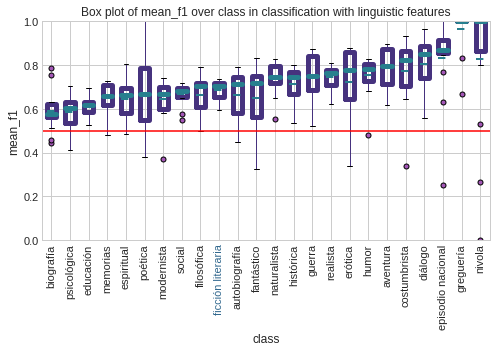

In [114]:
describe_data.boxplots(results_df, "mean_f1", "class", outdir, "classification with linguistic features", rotation = 90, figsize=[7,5],baseline=0.5,sort_by = "median", color_label_position=9)

In [118]:
results_df.groupby(["class"]).median().sort_values(by="mean_f1").index.get_loc("ficción literaria")

9

In [119]:
results_df.groupby(["class"]).median().sort_values(by="mean_f1").shape

(24, 11)

In [149]:
results_df[["mean_f1"]].mean()

mean_f1    0.714286
dtype: float64

Creation of random categories as random sugbenres:

In [37]:
random_genres = []
range_ = 10
for i in range(range_):
    i += 1
    random_genre = "random-genre"+str(i)
    random_genres.append(random_genre)
    p = [(((i/100)*5)+0.50)-0.02, (0.50-((i/100)*5))+0.02]
    print(p)    
    binary_metadata_df[random_genre] = np.random.choice([0, 1], size=(binary_metadata_df.shape[0],), p= p)

[0.53, 0.47000000000000003]
[0.58, 0.42000000000000004]
[0.63, 0.37]
[0.6799999999999999, 0.32]
[0.73, 0.27]
[0.78, 0.22]
[0.8300000000000001, 0.16999999999999996]
[0.88, 0.11999999999999998]
[0.9299999999999999, 0.07000000000000005]
[0.98, 0.02]


In [38]:
binary_metadata_df.sum()

autobiografía         29
aventura              49
biografía             33
costumbrista          16
diálogo                9
educación             71
episodio nacional     11
erótica               17
espiritual            34
fantástico            24
filosófica            92
greguería              2
guerra                18
histórica            101
humor                 51
memorias              57
modernista            36
naturalista           83
nivola                 5
poética                7
psicológica           20
realista             223
social               186
ficción-literaria    178
random-genre1        165
random-genre2        152
random-genre3        128
random-genre4        121
random-genre5         95
random-genre6         86
random-genre7         60
random-genre8         53
random-genre9         20
random-genre10         5
dtype: int64

In [45]:
random_results_df = classify.classify(wdir = outdir, freq_table  = rel_tags_ling_pos_diff_mw_ord_ent_corpus_df,
                            metadata = binary_metadata_df,
              classes = subgenres+["ficción-literaria"]+random_genres, verbose = True,
              methods = ["LR"],#, 
              max_MFFs = [3000,5000,7000],  minimal_value_samples = 2,
              text_representations = ["log","log10","zscores"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features          ,@form_punctuation@pos   am.divs  1@person  am.verses  \
ne0001                0.064356  0.000765  0.018683   0.001325   
ne0002                0.095511  0.000501  0.035028   0.000000   
ne0003                0.100304  0.000633  0.044413   0.000000   
ne0004                0.101035  0.000613  0.048261   0.000000   
ne0005                0.091833  0.000571  0.054601   0.000000   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                0.052205     0.0  0.012655       0.043937   
ne0002                0.052929     0.0  0.020444       0.017878   
ne0003                0.049310     0.0  0.020160       0.017920   
ne0004                0.051165     0.0  0.022386       0.017341   
ne0005                0.054011     0.0  0.027795       0.010578   

        .@form_punctuation@pos    am.pds           ...            \
ne0001                0.052280  0.023182           ...             
ne0002                0.037056  0.013176           .

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross val

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersampled (58,) (58, 3000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 3000)
undersampling lpc
undersam

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (58,) (58, 7000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 7000)
undersampling lpc
undersampled (58,) (58, 7000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 7000)
undersampling lpc
undersampled (58,) (58, 7000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 7000)
undersampling lpc
undersampled (58,) (58, 7000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 7000)
undersampling lpc
undersampled (58,) (58, 7000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 7000)
undersampling lpc
undersampled (58,) (58, 7000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 7000)
undersampling lpc
undersampled (58,) (58, 7000) lpc
cross validation sampling of  autobiografía


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cross validation sampling of  aventura
(358,)
(358, 3000)
undersampling lpc
undersampled (98,) (98, 3000) lpc
cros

(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
(358,)
(358, 7000)
undersampling lpc
undersampled (98,) (98, 7000) lpc
cross validation sampling of  aventura
result of 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lpc
cross validation sampling of  biografía
(358,)
(358, 3000)
undersampling lpc
undersampled (66,) (66, 3000) lp

(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
(358,)
(358, 7000)
undersampling lpc
undersampled (66,) (66, 7000) lpc
cross validation sampling of  biografía
r

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (32,) (32, 3000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 3000)
undersampling lpc
undersampled (

(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7000)
undersampling lpc
undersampled (32,) (32, 7000) lpc
cross validation 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross valida

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross validation sampling of  diálogo
(358,)
(358, 3000)
undersampling lpc
undersampled (18,) (18, 3000) lpc
cross vali

(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
(358,)
(358, 7000)
undersampling lpc
undersampled (18,) (18, 7000) lpc
cross validation sampling of  diálogo
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.1618580491303865, pvalue=2.1950834884705296e-10)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) (142, 3000) lpc
cross validation sampling of  educación
(358,)
(358, 3000)
undersampling lpc
undersampled (142,) 

(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampling of  educación
(358,)
(358, 7000)
undersampling lpc
undersampled (142,) (142, 7000) lpc
cross validation sampli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
unde

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
undersampling lpc
undersampled (22,) (22, 3000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 3000)
un

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (22,) (22, 7000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7000)
undersampling lpc
undersampled (22,) (22, 7000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7000)
undersampling lpc
undersampled (22,) (22, 7000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7000)
undersampling lpc
undersampled (22,) (22, 7000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7000)
undersampling lpc
undersampled (22,) (22, 7000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7000)
undersampling lpc
undersampled (22,) (22, 7000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7000)
undersampling lpc
undersampled (22,) (22, 7000) lpc
cross validation sam

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross valida

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross validation sampling of  erótica
(358,)
(358, 3000)
undersampling lpc
undersampled (34,) (34, 3000) lpc
cross vali

(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
(358,)
(358, 7000)
undersampling lpc
undersampled (34,) (34, 7000) lpc
cross validation sampling of  erótica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.278547207923973, pvalue=1.8228973620042335e-19)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 3000) lpc
cross validation sampling of  espiritual
(358,)
(358, 3000)
undersampling lpc
undersampled (68,) (68, 30

(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  espiritual
(358,)
(358, 7000)
undersampling lpc
undersampled (68,) (68, 7000) lpc
cross validation sampling of  esp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 3000) lpc
cross validation sampling of  fantástico
(358,)
(358, 3000)
undersampling lpc
undersampled (48,) (48, 30

(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fantástico
(358,)
(358, 7000)
undersampling lpc
undersampled (48,) (48, 7000) lpc
cross validation sampling of  fan

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (18

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (184,) (184, 3000) lpc
cross validation sampling of  filosófica
(358,)
(358, 3000)
undersampling lpc
undersampled (

(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validation sampling of  filosófica
(358,)
(358, 7000)
undersampling lpc
undersampled (184,) (184, 7000) lpc
cross validatio

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validati

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross validation sampling of  greguería
(358,)
(358, 3000)
undersampling lpc
undersampled (4,) (4, 3000) lpc
cross valida

(358,)
(358, 7000)
undersampling lpc
undersampled (4,) (4, 7000) lpc
cross validation sampling of  greguería
(358,)
(358, 7000)
undersampling lpc
undersampled (4,) (4, 7000) lpc
cross validation sampling of  greguería
(358,)
(358, 7000)
undersampling lpc
undersampled (4,) (4, 7000) lpc
cross validation sampling of  greguería
(358,)
(358, 7000)
undersampling lpc
undersampled (4,) (4, 7000) lpc
cross validation sampling of  greguería
(358,)
(358, 7000)
undersampling lpc
undersampled (4,) (4, 7000) lpc
cross validation sampling of  greguería
(358,)
(358, 7000)
undersampling lpc
undersampled (4,) (4, 7000) lpc
cross validation sampling of  greguería
(358,)
(358, 7000)
undersampling lpc
undersampled (4,) (4, 7000) lpc
cross validation sampling of  greguería
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.341528403189805, pvalue=2.340440092141138e-14)
Class: 	 greguería
Scores:
 	 f1      1.0
rec     1.0
prec    1.0
dtype: float64
p-value:  0.0
Baseline: 		 0.

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation s

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation sampling of  guerra
(358,)
(358, 3000)
undersampling lpc
undersampled (36,) (36, 3000) lpc
cross validation

(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
(358,)
(358, 7000)
undersampling lpc
undersampled (36,) (36, 7000) lpc
cross validation sampling of  guerra
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.974311957463684, pvalue=8.300111011496558e-19)
Class: 	 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (2

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) (202, 3000) lpc
cross validation sampling of  histórica
(358,)
(358, 3000)
undersampling lpc
undersampled (202,) 

(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampling of  histórica
(358,)
(358, 7000)
undersampling lpc
undersampled (202,) (202, 7000) lpc
cross validation sampli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross vali

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross validation sampling of  humor
(358,)
(358, 3000)
undersampling lpc
undersampled (102,) (102, 3000) lpc
cross va

(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
(358,)
(358, 7000)
undersampling lpc
undersampled (102,) (102, 7000) lpc
cross validation sampling of  humor
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.981565083298065, pvalue=3.216584371333901e-38)
C

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 30

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 3000) lpc
cross validation sampling of  memorias
(358,)
(358, 3000)
undersampling lpc
undersampled (114,) (114, 

(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  memorias
(358,)
(358, 7000)
undersampling lpc
undersampled (114,) (114, 7000) lpc
cross validation sampling of  m

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 3000) lpc
cross validation sampling of  modernista
(358,)
(358, 3000)
undersampling lpc
undersampled (72,) (72, 30

(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  modernista
(358,)
(358, 7000)
undersampling lpc
undersampled (72,) (72, 7000) lpc
cross validation sampling of  mod

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersampled (166,) (166, 3000) lpc
cross validation sampling of  naturalista
(358,)
(358, 3000)
undersampling lpc
undersam

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (166,) (166, 7000) lpc
cross validation sampling of  naturalista
(358,)
(358, 7000)
undersampling lpc
undersampled (166,) (166, 7000) lpc
cross validation sampling of  naturalista
(358,)
(358, 7000)
undersampling lpc
undersampled (166,) (166, 7000) lpc
cross validation sampling of  naturalista
(358,)
(358, 7000)
undersampling lpc
undersampled (166,) (166, 7000) lpc
cross validation sampling of  naturalista
(358,)
(358, 7000)
undersampling lpc
undersampled (166,) (166, 7000) lpc
cross validation sampling of  naturalista
(358,)
(358, 7000)
undersampling lpc
undersampled (166,) (166, 7000) lpc
cross validation sampling of  naturalista
(358,)
(358, 7000)
undersampling lpc
undersampled (166,) (166, 7000) lpc
cross validation sampling of  naturalista


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation s

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  nivola
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation

undersampled (10,) (10, 7000) lpc
cross validation sampling of  nivola
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  nivola
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  nivola
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  nivola
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  nivola
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  nivola
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  nivola
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=73.99999999999999, pvalue=6.013782054054428e-52)
Class: 	 nivola
Scores:
 	 f1      1.0
rec     1.0
prec    1.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.5


analysed class:	 poética
* Culling da

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross valida

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross validation sampling of  poética
(358,)
(358, 3000)
undersampling lpc
undersampled (14,) (14, 3000) lpc
cross vali

(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
(358,)
(358, 7000)
undersampling lpc
undersampled (14,) (14, 7000) lpc
cross validation sampling of  poética
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.0715354698262223, pvalue=0.2876624243427211)
Clas

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  psicológica
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (

(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  psicológica
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 30

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 3000) lpc
cross validation sampling of  realista
(358,)
(358, 3000)
undersampling lpc
undersampled (270,) (270, 

(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  realista
(358,)
(358, 7000)
undersampling lpc
undersampled (270,) (270, 7000) lpc
cross validation sampling of  r

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cros

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cross validation sampling of  social
(358,)
(358, 3000)
undersampling lpc
undersampled (344,) (344, 3000) lpc
cr

(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
(358,)
(358, 7000)
undersampling lpc
undersampled (344,) (344, 7000) lpc
cross validation sampling of  social
result of 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 3000)
undersampling lpc
undersampled (356,) (356, 3000) lpc
cross validation sampling of  ficción-literaria
(358,)
(3

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.75583174807363, pvalue=4.083392945053144e-41)
Class: 	 ficción-literaria
Scores:
 	 f1      0.719
rec     0.713
prec    0.735
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.21899999999999997
MFW 7000
The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (356,) (356, 7000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 7000)
undersampling lpc
undersampled (356,) (356, 7000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 7000)
undersampling lpc
undersampled (356,) (356, 7000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 7000)
undersampling lpc
undersampled (356,) (356, 7000) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 7000)
undersampling lpc


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling lpc
undersampled (330,) (330, 3000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (330,) (330, 7000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 7000)
undersampling lpc
undersampled (330,) (330, 7000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 7000)
undersampling lpc
undersampled (330,) (330, 7000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 7000)
undersampling lpc
undersampled (330,) (330, 7000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 7000)
undersampling lpc
undersampled (330,) (330, 7000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 7000)
undersampling lpc
undersampled (330,) (330, 7000) lpc
cross validation sampling of  random-genre1
(358,)
(358, 7000)
undersampling lpc
undersampled (330,) (330, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling lpc
undersampled (304,) (304, 3000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (304,) (304, 7000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 7000)
undersampling lpc
undersampled (304,) (304, 7000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 7000)
undersampling lpc
undersampled (304,) (304, 7000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 7000)
undersampling lpc
undersampled (304,) (304, 7000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 7000)
undersampling lpc
undersampled (304,) (304, 7000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 7000)
undersampling lpc
undersampled (304,) (304, 7000) lpc
cross validation sampling of  random-genre2
(358,)
(358, 7000)
undersampling lpc
undersampled (304,) (304, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling lpc
undersampled (256,) (256, 3000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (256,) (256, 7000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 7000)
undersampling lpc
undersampled (256,) (256, 7000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 7000)
undersampling lpc
undersampled (256,) (256, 7000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 7000)
undersampling lpc
undersampled (256,) (256, 7000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 7000)
undersampling lpc
undersampled (256,) (256, 7000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 7000)
undersampling lpc
undersampled (256,) (256, 7000) lpc
cross validation sampling of  random-genre3
(358,)
(358, 7000)
undersampling lpc
undersampled (256,) (256, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling lpc
undersampled (242,) (242, 3000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (242,) (242, 7000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 7000)
undersampling lpc
undersampled (242,) (242, 7000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 7000)
undersampling lpc
undersampled (242,) (242, 7000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 7000)
undersampling lpc
undersampled (242,) (242, 7000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 7000)
undersampling lpc
undersampled (242,) (242, 7000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 7000)
undersampling lpc
undersampled (242,) (242, 7000) lpc
cross validation sampling of  random-genre4
(358,)
(358, 7000)
undersampling lpc
undersampled (242,) (242, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling lpc
undersampled (190,) (190, 3000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (190,) (190, 7000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 7000)
undersampling lpc
undersampled (190,) (190, 7000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 7000)
undersampling lpc
undersampled (190,) (190, 7000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 7000)
undersampling lpc
undersampled (190,) (190, 7000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 7000)
undersampling lpc
undersampled (190,) (190, 7000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 7000)
undersampling lpc
undersampled (190,) (190, 7000) lpc
cross validation sampling of  random-genre5
(358,)
(358, 7000)
undersampling lpc
undersampled (190,) (190, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling lpc
undersampled (172,) (172, 3000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (172,) (172, 7000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 7000)
undersampling lpc
undersampled (172,) (172, 7000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 7000)
undersampling lpc
undersampled (172,) (172, 7000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 7000)
undersampling lpc
undersampled (172,) (172, 7000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 7000)
undersampling lpc
undersampled (172,) (172, 7000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 7000)
undersampling lpc
undersampled (172,) (172, 7000) lpc
cross validation sampling of  random-genre6
(358,)
(358, 7000)
undersampling lpc
undersampled (172,) (172, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling lpc
undersampled (120,) (120, 3000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (120,) (120, 7000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 7000)
undersampling lpc
undersampled (120,) (120, 7000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 7000)
undersampling lpc
undersampled (120,) (120, 7000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 7000)
undersampling lpc
undersampled (120,) (120, 7000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 7000)
undersampling lpc
undersampled (120,) (120, 7000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 7000)
undersampling lpc
undersampled (120,) (120, 7000) lpc
cross validation sampling of  random-genre7
(358,)
(358, 7000)
undersampling lpc
undersampled (120,) (120, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling lpc
undersampled (106,) (106, 3000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 3000)
undersampling 

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (106,) (106, 7000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 7000)
undersampling lpc
undersampled (106,) (106, 7000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 7000)
undersampling lpc
undersampled (106,) (106, 7000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 7000)
undersampling lpc
undersampled (106,) (106, 7000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 7000)
undersampling lpc
undersampled (106,) (106, 7000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 7000)
undersampling lpc
undersampled (106,) (106, 7000) lpc
cross validation sampling of  random-genre8
(358,)
(358, 7000)
undersampling lpc
undersampled (106,) (106, 7000) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersampled (40,) (40, 3000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 3000)
undersampling lpc
undersam

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  random-genre9
(358,)
(358, 7000)
undersampling lpc
undersampled (40,) (40, 7000) lpc
cross validation sampling of  random-genre9


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
unde

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['a_través_de@form_adposition@pos', 'daría@form_verb@pos', 'gato@form_noun@pos']
method used:	 LR
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
undersampled (10,) (10, 3000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 3000)
undersampling lpc
un

The three first MFWs:  ['a@form_adposition@pos', '241@ord_ent', '240@ord_ent']
The three last MFWs:  ['huía@form_verb@pos', 'reconoció@form_verb@pos', 'amistades@form_noun@pos']
method used:	 LR
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  random-genre10
(358,)
(358, 7000)
undersampling lpc
undersampled (10,) (10, 7000) lpc
cross validation sampling of  random-g

In [46]:
random_results_df.to_csv(outdir+"random_results_linguistic.csv",sep="\t")

In [121]:
random_results_df = pd.read_csv(outdir+"random_results_linguistic.csv",sep="\t",index_col=0)

In [124]:
random_results_df.groupby(["class"]).mean().round(2)

,mean_f1,mean_rec,mean_prec,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
class,,,,,,,,,,,
autobiografía,0.72,0.76,0.72,0.5,0.22,5000,True,0.00,58,10,10
aventura,0.84,0.84,0.87,0.5,0.34,5000,True,0.00,98,10,10
biografía,0.68,0.67,0.74,0.5,0.18,5000,True,0.00,66,10,10
costumbrista,0.84,0.88,0.84,0.5,0.34,5000,True,0.00,32,10,10
diálogo,0.83,0.84,0.83,0.5,0.33,5000,True,0.00,18,9,10
educación,0.61,0.62,0.63,0.5,0.11,5000,True,0.00,142,10,10
episodio nacional,0.87,0.91,0.86,0.5,0.37,5000,True,0.00,22,10,10
erótica,0.84,0.89,0.82,0.5,0.34,5000,True,0.00,34,10,10
espiritual,0.66,0.71,0.66,0.5,0.16,5000,True,0.00,68,10,10


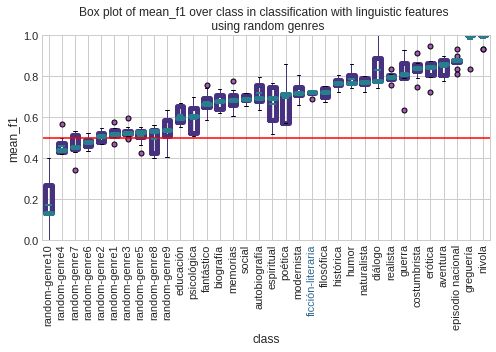

In [123]:
describe_data.boxplots(random_results_df, "mean_f1", "class", outdir, "classification with linguistic features \n using random genres", rotation = 90, figsize=[7,5], baseline=0.5, sort_by="median", color_label_position=20)

# 5.3.4. Classification with External Metadata

Getting data:

In [125]:
recat_metadata_df =  pd.read_csv("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_recategorized.csv", sep="\t",index_col=0).fillna("")
recat_metadata_df.shape


(358, 183)

In [126]:
recat_metadata_df.head()

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,author.movement_ordinal,author.submovement_ordinal,authorText.relation_ordinal,litHist.brow_ordinal,setting.type_ordinal,time.period_ordinal,protagonist.age_ordinal,protagonist.socLevel_ordinal,end_ordinal,representation_ordinal
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,3.69129e+07,XX842743,...,1,4,0,,1,3,3,2,4,2
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,0,0,0,,3,3,2,0,0,2
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,0,0,0,0,-,3,2,0,4,2
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,0,0,0,,3,3,2,2,4,2
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,7.1396e+07,XX1014802,...,0,0,0,,3,3,1,0,3,2


In [127]:
recat_metadata_df["author.gender"]

ne0001    male
ne0002    male
ne0003    male
ne0004    male
ne0005    male
ne0006    male
ne0007    male
ne0008    male
ne0009    male
ne0010    male
ne0011    male
ne0013    male
ne0014    male
ne0015    male
ne0016    male
ne0017    male
ne0018    male
ne0019    male
ne0020    male
ne0021    male
ne0022    male
ne0023    male
ne0024    male
ne0025    male
ne0026    male
ne0027    male
ne0028    male
ne0029    male
ne0030    male
ne0031    male
          ... 
ne0360    male
ne0361    male
ne0362    male
ne0363    male
ne0364    male
ne0365    male
ne0370    male
ne0373    male
ne0378    male
ne0379    male
ne0380    male
ne0381    male
ne0382    male
ne0384    male
ne0385    male
ne0387    male
ne0388    male
ne0390    male
ne0391    male
ne0392    male
ne0393    male
ne0394    male
ne0395    male
ne0396    male
ne0397    male
ne0398    male
ne0399    male
ne0401    male
ne0403    male
ne0404    male
Name: author.gender, Length: 358, dtype: object

Making lists of types of metadata:

In [137]:
metadata_features_lt = [ 'narrator', 'protagonist.gender', 'setting.type',  
                        'protagonist.age', 'protagonist.socLevel', 'protagonist.profession', 'representation', 
                        'setting.continent', 'setting.country', 'setting.settlement', 'setting.territory', 
                        'time.period', 'time.span',  'end',  
                        'setting.settlement.represented.exist', 'setting.represented',
                        'year','decade','litHist.pages','litHist.literaryQuality',
                        'author.litHist.pages','authorText.relation','author.name',"author.date.birth","author.date.death", "author.gender"]

In [129]:
extern_metadata_features_lt = ['year','decade','litHist.pages','litHist.literaryQuality',
                        'author.litHist.pages','authorText.relation','author.name',"author.date.birth","author.date.death", "author.gender"]

In [130]:
author_metadata_features_lt = ['author.litHist.pages','authorText.relation','author.name',"author.date.birth","author.date.death", "author.gender"]

Recoding into numerical classes all metadata:

In [138]:
recoded_recat_metadata_df = classify.label_encoder(recat_metadata_df[metadata_features_lt])
recoded_recat_metadata_df.shape

narrator
object
protagonist.gender
object
setting.type
object
protagonist.age
object
protagonist.socLevel
object
protagonist.profession
object
representation
object
setting.continent
object
setting.country
object
setting.settlement
object
setting.territory
object
time.period
object
time.span
object
end
object
setting.settlement.represented.exist
bool
setting.represented
object
year
int64
decade
int64
litHist.pages
float64
litHist.literaryQuality
object
author.litHist.pages
int64
authorText.relation
object
author.name
object
author.date.birth
int64
author.date.death
int64
author.gender
object


(358, 26)

Classification with all metadata:

In [ ]:
metadata_results_df = classify.classify(wdir = outdir, freq_table  = recoded_recat_metadata_df,
                            metadata = binary_metadata_df,
              classes = subgenres+["ficción-literaria"], verbose = True,
              methods = ["DT","RF","DT","RF"],#, 
              max_MFFs = [30],  minimal_value_samples = 2,
              text_representations = ["raw"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


In [51]:
metadata_results_df.shape

(96, 17)

In [52]:
metadata_results_df.sort_values(by="mean_f1", ascending=False)

,class,mean_f1,mean_rec,mean_prec,baseline,f1-baseline,classifier_name,text_representation,MFW,typography,f1s,test_result_pvalue,labels,sample_size,cv,sampling_times,classifier
44,greguería,1.000,1.000,1.000,0.5,0.500,DT,raw,30,True,"[1.0, 0.67, 1.0, 0.67, 1.0, 0.67, 1.0, 0.67, 0...",7.432505e-09,ne0173 1 ne0022 0 ne0172 1 ne0248 ...,4,2,10,"DecisionTreeClassifier(class_weight=None, crit..."
72,nivola,1.000,1.000,1.000,0.5,0.500,DT,raw,30,True,"[0.0, 1.0, 1.0, 1.0, 1.0, 0.67, 1.0, 1.0, 1.0,...",2.359977e-12,ne0314 0 ne0173 0 ne0074 1 ne0070 ...,10,5,10,"DecisionTreeClassifier(class_weight=None, crit..."
18,diálogo,1.000,1.000,1.000,0.5,0.500,DT,raw,30,True,"[1.0, 0.67, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67...",3.757097e-25,ne0058 0 ne0141 0 ne0186 0 ne0181 ...,18,9,10,"DecisionTreeClassifier(class_weight=None, crit..."
46,greguería,1.000,1.000,1.000,0.5,0.500,DT,raw,30,True,"[0.67, 0.67, 0.67, 0.67, 1.0, 0.67, 0.67, 0.67...",9.253328e-08,ne0172 1 ne0192 0 ne0173 1 ne0016 ...,4,2,10,"DecisionTreeClassifier(class_weight=None, crit..."
17,diálogo,0.963,1.000,0.944,0.5,0.463,RF,raw,30,True,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.67,...",1.136248e-18,ne0029 0 ne0275 1 ne0308 0 ne0033 ...,18,9,10,BaggingClassifier(base_estimator=DecisionTreeC...
26,episodio nacional,0.933,0.950,0.950,0.5,0.433,DT,raw,30,True,"[0.67, 1.0, 1.0, 1.0, 0.0, 1.0, 0.67, 1.0, 1.0...",1.409575e-23,ne0097 1 ne0283 1 ne0345 0 ne0279 ...,22,10,10,"DecisionTreeClassifier(class_weight=None, crit..."
76,poética,0.905,1.000,0.857,0.5,0.405,DT,raw,30,True,"[1.0, 0.67, 1.0, 0.67, 0.0, 0.0, 1.0, 0.0, 0.0...",4.293655e-01,ne0127 1 ne0380 1 ne0364 0 ne0349 ...,14,7,10,"DecisionTreeClassifier(class_weight=None, crit..."
14,costumbrista,0.900,0.900,0.950,0.5,0.400,DT,raw,30,True,"[0.8, 1.0, 0.8, 0.5, 0.8, 1.0, 0.0, 1.0, 1.0, ...",1.552495e-16,ne0155 0 ne0294 1 ne0151 0 ne0229 ...,32,10,10,"DecisionTreeClassifier(class_weight=None, crit..."
12,costumbrista,0.877,0.900,0.883,0.5,0.377,DT,raw,30,True,"[1.0, 0.67, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0,...",1.988597e-13,ne0308 1 ne0035 0 ne0397 1 ne0311 ...,32,10,10,"DecisionTreeClassifier(class_weight=None, crit..."
36,fantástico,0.867,0.867,0.883,0.5,0.367,DT,raw,30,True,"[0.86, 1.0, 0.8, 1.0, 1.0, 0.8, 1.0, 0.67, 1.0...",1.983124e-31,ne0292 0 ne0338 1 ne0286 1 ne0177 ...,48,10,10,"DecisionTreeClassifier(class_weight=None, crit..."


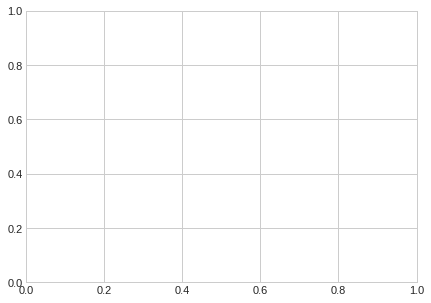

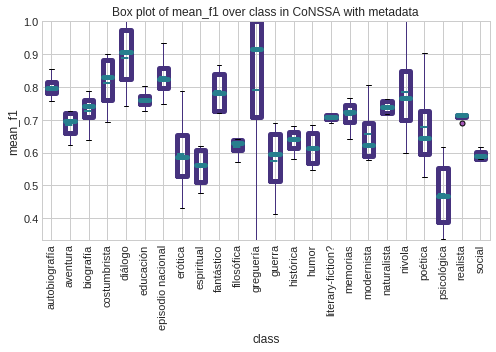

In [53]:
describe_data.boxplots(metadata_results_df, "mean_f1", "class", outdir, "CoNSSA with metadata", rotation = 90, figsize=[7,5])

In [135]:
recoded_recat_metadata_df

,narrator,protagonist.gender,setting.type,protagonist.age,protagonist.socLevel,protagonist.profession,representation,setting.continent,setting.country,setting.settlement,...,setting.represented,year,decade,litHist.pages,litHist.literaryQuality,author.litHist.pages,authorText.relation,author.name,author.date.birth,author.date.death
ne0001,4,1,4,3,1,11,2,3,22,59,...,66,1903,1900,2.0,2,117,3,11,1872,1956
ne0002,3,0,1,1,2,3,2,3,22,64,...,71,1889,1880,6.0,3,181,3,30,1843,1920
ne0003,4,1,3,1,2,20,2,3,22,135,...,33,1895,1890,2.0,2,181,3,30,1843,1920
ne0004,4,2,1,1,1,11,2,3,22,64,...,71,1895,1890,1.0,3,181,3,30,1843,1920
ne0005,3,0,1,6,2,9,2,3,22,64,...,71,1892,1890,2.0,0,181,3,30,1843,1920
ne0006,3,1,5,6,3,11,2,3,22,113,...,114,1891,1890,4.0,3,181,3,30,1843,1920
ne0007,3,0,1,3,1,11,2,3,22,133,...,71,1885,1880,0.5,0,8,3,56,1862,1909
ne0008,3,0,1,1,3,0,2,3,22,64,...,71,1896,1890,0.2,0,3,1,71,1873,1971
ne0009,3,0,1,6,2,14,2,3,22,64,...,71,1881,1880,5.0,3,181,3,30,1843,1920
ne0010,3,1,4,1,3,20,2,3,22,0,...,37,1905,1900,0.5,1,4,1,3,1873,1936


Classification with external metadata:

In [139]:
extern_metadata_results_df = classify.classify(wdir = outdir,
              freq_table  = recoded_recat_metadata_df[extern_metadata_features_lt],
              metadata = binary_metadata_df,
              classes = subgenres+["ficción-literaria"], verbose = True,
              methods = ["DT","RF","DT","RF"],#, 
              max_MFFs = [30],  minimal_value_samples = 2,
              text_representations = ["raw"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features          year  decade  litHist.pages  litHist.literaryQuality  \
ne0001  1903    1900            2.0                        2   
ne0002  1889    1880            6.0                        3   
ne0003  1895    1890            2.0                        2   
ne0004  1895    1890            1.0                        3   
ne0005  1892    1890            2.0                        0   

        author.litHist.pages  authorText.relation  author.name  \
ne0001                   117                    3           11   
ne0002                   181                    3           30   
ne0003                   181                    3           30   
ne0004                   181                    3           30   
ne0005                   181                    3           30   

        author.date.birth  author.date.death  author.gender  
ne0001               1872               1956              1  
ne0002               1843               1920              1  
ne0003        

(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of  aventura
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.24552405256453, pvalue=1.0070942043742438e-27)
Class: 	 aventura
Scores:
 	 f1      0.890
rec     0.935
prec    0.872
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.39
method used:	 RF
(358,)
(358, 10)
undersampling lpc
undersampled (98,) (98, 10) lpc
cross validation sampling of

(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.082339810044422, pvalue=2.2322419423864363e-25)
Class: 	 biografía
Scores:
 	 f1      0.841
rec     0.825
prec    0.883
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.34099999999999997
method used:	 RF
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross validation sampling of  biografía
(358,)
(358, 10)
undersampling lpc
undersampled (66,) (66, 10) lpc
cross

(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
(358,)
(358, 10)
undersampling lpc
undersampled (18,) (18, 10) lpc
cross validation sampling of  diálogo
result of comparing cross-validation to baseline Ttest_

(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
(358,)
(358, 10)
undersampling lpc
undersampled (142,) (142, 10) lpc
cross validation sampling of  educación
result of comparing

(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 10)
undersampling lpc
undersampled (22,) (22, 10) lpc
cross validation sampling of  episodio nacional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.34739979413365, pvalue=9.328493710910591e-22)
Class: 	 episodio nacional
Scores:
 	 f1      0.847
rec     0.900
prec    0.817
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.347


analysed class:	 erótica
* Culling data
labels done
Counter({'0': 341, '1': 17})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  17
Labels shape (358,) 
 Data shape (358, 10)
size after culling data: (358, 10) (358,)
typography  True
textual representation:  raw []
(358, 10)
MFW 30
The three first MFWs:  ['author.date.death', 'year', 'decade']
The three last MFWs:  ['author.gender', 'litHist.literaryQuality', 'litHist.pages']
method used:	 DT
(358,)
(358, 10)

(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
(358,)
(358, 10)
undersampling lpc
undersampled (68,) (68, 10) lpc
cross validation sampling of  espiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1092569299352317, pvalue=0.0024494256950554636)
Class: 	 

(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
(358,)
(358, 10)
undersampling lpc
undersampled (48,) (48, 10) lpc
cross validation sampling of  fantástico
result of comparing cross-va

(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 9) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
(358,)
(358, 10)
undersampling lpc
undersampled (4,) (4, 10) lpc
cross validation sampling of  greguería
result of comparing cross-validation to baseline Ttest_1

(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
(358,)
(358, 10)
undersampling lpc
undersampled (36,) (36, 10) lpc
cross validation sampling of  guerra
result of comparing cross-validation to baseline Ttest_1sampResu

(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.065415443481633, pvalue=1.7380675964618968e-12)
Class: 	 humor
Scores:
 	 f1      0.635
rec     0.643
prec    0.676
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.135
method used:	 RF
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humor
(358,)
(358, 10)
undersampling lpc
undersampled (102,) (102, 10) lpc
cross validation sampling of  humo

(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.978232283740239, pvalue=1.2203711654047336e-16)
Class: 	 memorias
Scores:
 	 f1      0.612
rec     0.610
prec    0.627
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.11199999999999999
method used:	 RF
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc
cross validation sampling of  memorias
(358,)
(358, 10)
undersampling lpc
undersampled (114,) (114, 10) lpc

(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
(358,)
(358, 10)
undersampling lpc
undersampled (166,) (166, 10) lpc
cross validation sampling of  naturalista
r

(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.216046270464266, pvalue=5.169587526051283e-19)
Class: 	 nivola
Scores:
 	 f1      0.933
rec     1.000
prec    0.900
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.43300000000000005
method used:	 DT
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling of  nivola
(358,)
(358, 10)
undersampling lpc
undersampled (10,) (10, 10) lpc
cross validation sampling o

(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
(358,)
(358, 10)
undersampling lpc
undersampled (14,) (14, 10) lpc
cross validation sampling of  poética
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.318875168026037, pvalue=0.023369926734724284)
Class: 	 poética
Scores:
 	 f1      0.810
rec     0.857
prec    0.786
dtype: float64
p-value:  0.0234
Baseline: 		 0.5
RF
0.31000000000000005


analysed class:	 psicológica
* Culling data
labels done
Counter({'0': 338, '1': 20})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  20
Labels shape (358,) 
 Data

(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.666044838406606, pvalue=2.2678309240395998e-32)
Class: 	 realista
Scores:
 	 f1      0.651
rec     0.661
prec    0.652
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.15100000000000002
method used:	 RF
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lpc
cross validation sampling of  realista
(358,)
(358, 10)
undersampling lpc
undersampled (270,) (270, 10) lp

(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.794741788567366, pvalue=8.012092911585063e-27)
Class: 	 social
Scores:
 	 f1      0.623
rec     0.604
prec    0.667
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.123
method used:	 RF
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling of  social
(358,)
(358, 10)
undersampling lpc
undersampled (344,) (344, 10) lpc
cross validation sampling o

           class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
0  autobiografía    0.826     0.833      0.842       0.5        0.326   
1  autobiografía    0.792     0.783      0.843       0.5        0.292   
2  autobiografía    0.729     0.767      0.795       0.5        0.229   
3  autobiografía    0.878     0.900      0.883       0.5        0.378   
4       aventura    0.890     0.935      0.872       0.5        0.390   

  classifier_name text_representation  MFW  typography  \
0              DT                 raw   30        True   
1              RF                 raw   30        True   
2              DT                 raw   30        True   
3              RF                 raw   30        True   
4              DT                 raw   30        True   

                                                 f1s  test_result_pvalue  \
0  [0.67, 0.86, 0.8, 1.0, 0.75, 0.5, 0.86, 0.8, 0...        3.505786e-38   
1  [1.0, 0.86, 1.0, 0.86, 0.86, 0.8, 0.67, 1.0, 0...        

In [140]:
extern_metadata_features_lt

['year',
 'decade',
 'litHist.pages',
 'litHist.literaryQuality',
 'author.litHist.pages',
 'authorText.relation',
 'author.name',
 'author.date.birth',
 'author.date.death',
 'author.gender']

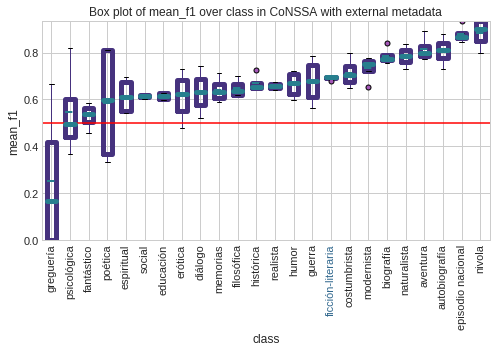

In [145]:
describe_data.boxplots(extern_metadata_results_df, "mean_f1", "class", outdir, "CoNSSA with external metadata", rotation = 90, figsize=[7,5], sort_by="median",baseline=0.5, color_label_position=15)

In [153]:
results_df[["mean_f1"]].mean()

mean_f1    0.714286
dtype: float64

In [148]:
extern_metadata_results_df[["mean_f1"]].mean()

mean_f1    0.66849
dtype: float64

In [155]:
stats.ttest_ind(
    results_df["mean_f1"],
    extern_metadata_results_df["mean_f1"],
    equal_var=False)


Ttest_indResult(statistic=2.530664794066079, pvalue=0.012480429606674556)

Classification only with authorial metadata:

In [151]:
authorial_metadata_results_df = classify.classify(wdir = outdir,
              freq_table  = recoded_recat_metadata_df[author_metadata_features_lt],
              metadata = binary_metadata_df,
              classes = subgenres+["ficción-literaria"], verbose = True,
              methods = ["DT","RF","DT","RF"],#, 
              max_MFFs = [30],  minimal_value_samples = 2,
              text_representations = ["raw"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features          author.litHist.pages  authorText.relation  author.name  \
ne0001                   117                    3           11   
ne0002                   181                    3           30   
ne0003                   181                    3           30   
ne0004                   181                    3           30   
ne0005                   181                    3           30   

        author.date.birth  author.date.death  author.gender  
ne0001               1872               1956              1  
ne0002               1843               1920              1  
ne0003               1843               1920              1  
ne0004               1843               1920              1  
ne0005               1843               1920              1  
in classify, cut_raw_features,  (358, 6)


analysed class:	 autobiografía
* Culling data
labels done
Counter({'0': 329, '1': 29})
All your class values had more than 10 examples. Congrats :)
Least popupated class 

(358,)
(358, 6)
undersampling lpc
undersampled (98,) (98, 6) lpc
cross validation sampling of  aventura
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.394293311144661, pvalue=7.416925884580357e-22)
Class: 	 aventura
Scores:
 	 f1      0.629
rec     0.610
prec    0.677
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.129
method used:	 RF
(358,)
(358, 6)
undersampling lpc
undersampled (98,) (98, 6) lpc
cross validation sampling of  aventura
(358,)
(358, 6)
undersampling lpc
undersampled (98,) (98, 6) lpc
cross validation sampling of  aventura
(358,)
(358, 6)
undersampling lpc
undersampled (98,) (98, 6) lpc
cross validation sampling of  aventura
(358,)
(358, 6)
undersampling lpc
undersampled (98,) (98, 6) lpc
cross validation sampling of  aventura
(358,)
(358, 6)
undersampling lpc
undersampled (98,) (98, 6) lpc
cross validation sampling of  aventura
(358,)
(358, 6)
undersampling lpc
undersampled (98,) (98, 6) lpc
cross validation sampling of  aventura
(3

(358,)
(358, 6)
undersampling lpc
undersampled (66,) (66, 6) lpc
cross validation sampling of  biografía
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.425227841518968, pvalue=9.21154270496057e-34)
Class: 	 biografía
Scores:
 	 f1      0.907
rec     0.908
prec    0.922
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.40700000000000003
method used:	 RF
(358,)
(358, 6)
undersampling lpc
undersampled (66,) (66, 6) lpc
cross validation sampling of  biografía
(358,)
(358, 6)
undersampling lpc
undersampled (66,) (66, 6) lpc
cross validation sampling of  biografía
(358,)
(358, 6)
undersampling lpc
undersampled (66,) (66, 6) lpc
cross validation sampling of  biografía
(358,)
(358, 6)
undersampling lpc
undersampled (66,) (66, 6) lpc
cross validation sampling of  biografía
(358,)
(358, 6)
undersampling lpc
undersampled (66,) (66, 6) lpc
cross validation sampling of  biografía
(358,)
(358, 6)
undersampling lpc
undersampled (66,) (66, 6) lpc
cross validation samp

(358,)
(358, 6)
undersampling lpc
undersampled (18,) (18, 6) lpc
cross validation sampling of  diálogo
(358,)
(358, 6)
undersampling lpc
undersampled (18,) (18, 6) lpc
cross validation sampling of  diálogo
(358,)
(358, 6)
undersampling lpc
undersampled (18,) (18, 6) lpc
cross validation sampling of  diálogo
(358,)
(358, 6)
undersampling lpc
undersampled (18,) (18, 6) lpc
cross validation sampling of  diálogo
(358,)
(358, 6)
undersampling lpc
undersampled (18,) (18, 6) lpc
cross validation sampling of  diálogo
(358,)
(358, 6)
undersampling lpc
undersampled (18,) (18, 6) lpc
cross validation sampling of  diálogo
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.620263063363233, pvalue=0.000488530736026043)
Class: 	 diálogo
Scores:
 	 f1      0.741
rec     0.889
prec    0.667
dtype: float64
p-value:  0.0005
Baseline: 		 0.5
DT
0.241
method used:	 RF
(358,)
(358, 6)
undersampling lpc
undersampled (18,) (18, 6) lpc
cross validation sampling of  diálogo
(358,)
(3

(358,)
(358, 6)
undersampling lpc
undersampled (142,) (142, 6) lpc
cross validation sampling of  educación
(358,)
(358, 6)
undersampling lpc
undersampled (142,) (142, 6) lpc
cross validation sampling of  educación
(358,)
(358, 6)
undersampling lpc
undersampled (142,) (142, 6) lpc
cross validation sampling of  educación
(358,)
(358, 6)
undersampling lpc
undersampled (142,) (142, 6) lpc
cross validation sampling of  educación
(358,)
(358, 6)
undersampling lpc
undersampled (142,) (142, 6) lpc
cross validation sampling of  educación
(358,)
(358, 6)
undersampling lpc
undersampled (142,) (142, 6) lpc
cross validation sampling of  educación
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.2950219918062236, pvalue=0.001366391877004838)
Class: 	 educación
Scores:
 	 f1      0.507
rec     0.448
prec    0.619
dtype: float64
p-value:  0.0014
Baseline: 		 0.5
DT
0.007000000000000006
method used:	 RF
(358,)
(358, 6)
undersampling lpc
undersampled (142,) (142, 6) lpc
cr

(358,)
(358, 6)
undersampling lpc
undersampled (34,) (34, 6) lpc
cross validation sampling of  erótica
(358,)
(358, 6)
undersampling lpc
undersampled (34,) (34, 6) lpc
cross validation sampling of  erótica
(358,)
(358, 6)
undersampling lpc
undersampled (34,) (34, 6) lpc
cross validation sampling of  erótica
(358,)
(358, 6)
undersampling lpc
undersampled (34,) (34, 6) lpc
cross validation sampling of  erótica
(358,)
(358, 6)
undersampling lpc
undersampled (34,) (34, 6) lpc
cross validation sampling of  erótica
(358,)
(358, 6)
undersampling lpc
undersampled (34,) (34, 6) lpc
cross validation sampling of  erótica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.845997441542784, pvalue=6.480426351172822e-08)
Class: 	 erótica
Scores:
 	 f1      0.740
rec     0.800
prec    0.733
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.24
method used:	 RF
(358,)
(358, 6)
undersampling lpc
undersampled (34,) (34, 6) lpc
cross validation sampling of  erótica
(358,)
(358,

(358,)
(358, 6)
undersampling lpc
undersampled (68,) (68, 6) lpc
cross validation sampling of  espiritual
(358,)
(358, 6)
undersampling lpc
undersampled (68,) (68, 6) lpc
cross validation sampling of  espiritual
(358,)
(358, 6)
undersampling lpc
undersampled (68,) (68, 6) lpc
cross validation sampling of  espiritual
(358,)
(358, 6)
undersampling lpc
undersampled (68,) (68, 6) lpc
cross validation sampling of  espiritual
(358,)
(358, 6)
undersampling lpc
undersampled (68,) (68, 6) lpc
cross validation sampling of  espiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.21501757068136965, pvalue=0.830195936570199)
Class: 	 espiritual
Scores:
 	 f1      0.601
rec     0.650
prec    0.610
dtype: float64
p-value:  0.8302
Baseline: 		 0.5
DT
0.10099999999999998
method used:	 RF
(358,)
(358, 6)
undersampling lpc
undersampled (68,) (68, 6) lpc
cross validation sampling of  espiritual
(358,)
(358, 6)
undersampling lpc
undersampled (68,) (68, 6) lpc
cross validat

(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
(358,)
(358, 6)
undersampling lpc
undersampled (184,) (184, 6) lpc
cross validation sampling of  filosófica
result of comparing cross-va

undersampled (4,) (4, 6) lpc
cross validation sampling of  greguería
(358,)
(358, 6)
undersampling lpc
undersampled (4,) (4, 6) lpc
cross validation sampling of  greguería
(358,)
(358, 6)
undersampling lpc
undersampled (4,) (4, 6) lpc
cross validation sampling of  greguería
(358,)
(358, 6)
undersampling lpc
undersampled (4,) (4, 6) lpc
cross validation sampling of  greguería
(358,)
(358, 6)
undersampling lpc
undersampled (4,) (4, 6) lpc
cross validation sampling of  greguería
(358,)
(358, 6)
undersampling lpc
undersampled (4,) (4, 6) lpc
cross validation sampling of  greguería
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.509545634828813, pvalue=2.3496182145068966e-09)
Class: 	 greguería
Scores:
 	 f1      1.0
rec     1.0
prec    1.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.5
method used:	 RF
(358,)
(358, 6)
undersampling lpc
undersampled (4,) (4, 6) lpc
cross validation sampling of  greguería
(358,)
(358, 6)
undersampling lpc
undersampled (4

(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
(358,)
(358, 6)
undersampling lpc
undersampled (202,) (202, 6) lpc
cross validation sampling of  histórica
result of comparing cross-validation 

(358,)
(358, 6)
undersampling lpc
undersampled (102,) (102, 6) lpc
cross validation sampling of  humor
(358,)
(358, 6)
undersampling lpc
undersampled (102,) (102, 6) lpc
cross validation sampling of  humor
(358,)
(358, 6)
undersampling lpc
undersampled (102,) (102, 6) lpc
cross validation sampling of  humor
(358,)
(358, 6)
undersampling lpc
undersampled (102,) (102, 6) lpc
cross validation sampling of  humor
(358,)
(358, 6)
undersampling lpc
undersampled (102,) (102, 6) lpc
cross validation sampling of  humor
(358,)
(358, 6)
undersampling lpc
undersampled (102,) (102, 6) lpc
cross validation sampling of  humor
(358,)
(358, 6)
undersampling lpc
undersampled (102,) (102, 6) lpc
cross validation sampling of  humor
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.099697378522931, pvalue=6.63073425792778e-17)
Class: 	 humor
Scores:
 	 f1      0.731
rec     0.687
prec    0.848
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.23099999999999998
method used:	 RF

(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
(358,)
(358, 6)
undersampling lpc
undersampled (72,) (72, 6) lpc
cross validation sampling of  modernista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.288980753977802, pvalue=3.890493400438066e-15)
Class: 	 modernista
Scores

(358,)
(358, 6)
undersampling lpc
undersampled (166,) (166, 6) lpc
cross validation sampling of  naturalista
(358,)
(358, 6)
undersampling lpc
undersampled (166,) (166, 6) lpc
cross validation sampling of  naturalista
(358,)
(358, 6)
undersampling lpc
undersampled (166,) (166, 6) lpc
cross validation sampling of  naturalista
(358,)
(358, 6)
undersampling lpc
undersampled (166,) (166, 6) lpc
cross validation sampling of  naturalista
(358,)
(358, 6)
undersampling lpc
undersampled (166,) (166, 6) lpc
cross validation sampling of  naturalista
(358,)
(358, 6)
undersampling lpc
undersampled (166,) (166, 6) lpc
cross validation sampling of  naturalista
(358,)
(358, 6)
undersampling lpc
undersampled (166,) (166, 6) lpc
cross validation sampling of  naturalista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.261990881076116, pvalue=1.2852681534037207e-31)
Class: 	 naturalista
Scores:
 	 f1      0.725
rec     0.800
prec    0.677
dtype: float64
p-value:  0.0
Baseli

textual representation:  raw []
(358, 6)
MFW 30
The three first MFWs:  ['author.date.death', 'author.date.birth', 'author.litHist.pages']
The three last MFWs:  ['author.name', 'authorText.relation', 'author.gender']
method used:	 DT
(358,)
(358, 6)
undersampling lpc
undersampled (14,) (14, 6) lpc
cross validation sampling of  poética
(358,)
(358, 6)
undersampling lpc
undersampled (14,) (14, 6) lpc
cross validation sampling of  poética
(358,)
(358, 6)
undersampling lpc
undersampled (14,) (14, 6) lpc
cross validation sampling of  poética
(358,)
(358, 6)
undersampling lpc
undersampled (14,) (14, 6) lpc
cross validation sampling of  poética
(358,)
(358, 6)
undersampling lpc
undersampled (14,) (14, 6) lpc
cross validation sampling of  poética
(358,)
(358, 6)
undersampling lpc
undersampled (14,) (14, 6) lpc
cross validation sampling of  poética
(358,)
(358, 6)
undersampling lpc
undersampled (14,) (14, 6) lpc
cross validation sampling of  poética
(358,)
(358, 6)
undersampling lpc
undersampled

(358,)
(358, 6)
undersampling lpc
undersampled (40,) (40, 6) lpc
cross validation sampling of  psicológica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.6917329782309796, pvalue=0.09384240407965692)
Class: 	 psicológica
Scores:
 	 f1      0.600
rec     0.650
prec    0.617
dtype: float64
p-value:  0.0938
Baseline: 		 0.5
RF
0.09999999999999998
method used:	 DT
(358,)
(358, 6)
undersampling lpc
undersampled (40,) (40, 6) lpc
cross validation sampling of  psicológica
(358,)
(358, 6)
undersampling lpc
undersampled (40,) (40, 6) lpc
cross validation sampling of  psicológica
(358,)
(358, 6)
undersampling lpc
undersampled (40,) (40, 6) lpc
cross validation sampling of  psicológica
(358,)
(358, 6)
undersampling lpc
undersampled (40,) (40, 6) lpc
cross validation sampling of  psicológica
(358,)
(358, 6)
undersampling lpc
undersampled (40,) (40, 6) lpc
cross validation sampling of  psicológica
(358,)
(358, 6)
undersampling lpc
undersampled (40,) (40, 6) lpc
cross

(358,)
(358, 6)
undersampling lpc
undersampled (270,) (270, 6) lpc
cross validation sampling of  realista
(358,)
(358, 6)
undersampling lpc
undersampled (270,) (270, 6) lpc
cross validation sampling of  realista
(358,)
(358, 6)
undersampling lpc
undersampled (270,) (270, 6) lpc
cross validation sampling of  realista
(358,)
(358, 6)
undersampling lpc
undersampled (270,) (270, 6) lpc
cross validation sampling of  realista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.750663142625253, pvalue=1.1403736560961703e-45)
Class: 	 realista
Scores:
 	 f1      0.687
rec     0.747
prec    0.641
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.18700000000000006


analysed class:	 social
* Culling data
labels done
Counter({'1': 186, '0': 172})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  172
Labels shape (358,) 
 Data shape (358, 6)
size after culling data: (358, 6) (358,)
typography  True
textual representation:  raw 

(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validation sampling of  ficción-literaria
(358,)
(358, 6)
undersampling lpc
undersampled (356,) (356, 6) lpc
cross validat

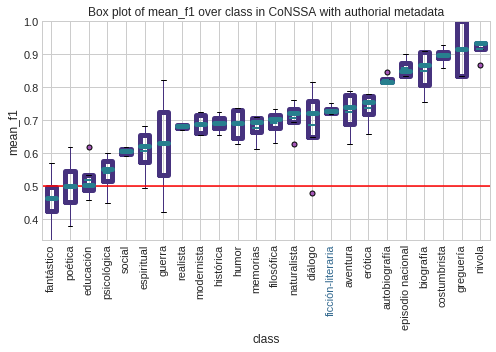

In [152]:
describe_data.boxplots(authorial_metadata_results_df, "mean_f1", "class", outdir, "CoNSSA with authorial metadata", rotation = 90, figsize=[7,5], sort_by="median",baseline=0.5, color_label_position=15)

In [156]:
authorial_metadata_results_df[["mean_f1"]].mean()

mean_f1    0.700969
dtype: float64

In [157]:
stats.ttest_ind(
    results_df["mean_f1"],
    authorial_metadata_results_df["mean_f1"],
    equal_var=False)


Ttest_indResult(statistic=0.8142334197985902, pvalue=0.41675639571501877)